# Ejercicio Clustering jerárquico
Agrupación de Países según Indicadores de Desarrollo

## Objetivo:
Aplicar clustering jerárquico para agrupar países en función de su desarrollo económico y social, utilizando indicadores como el PIB per cápita, el índice de desarrollo humano (IDH) y la esperanza de vida. 

## Dataset: "Countries of the World"

Disponible en Kaggle: descargar el archivo countries of the world.csv y cargarlo en su entorno de trabajo.

1️. Cargar el dataset y explorar los datos

Los estudiantes deben:
- Cargar el dataset en Pandas.


In [1]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "countries of the world.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "fernandol/countries-of-the-world",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

#print("First 5 records:", df.head())

C:\Users\aedaniel\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\aedaniel\AppData\Local\Temp\ipykernel_29084\2510673871.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


- Explorar sus variables y realizar una limpieza inicial.



In [2]:
print("Tipos de datos por columna:")
print(df.dtypes)

Tipos de datos por columna:
Country                                object
Region                                 object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)             object
Coastline (coast/area ratio)           object
Net migration                          object
Infant mortality (per 1000 births)     object
GDP ($ per capita)                    float64
Literacy (%)                           object
Phones (per 1000)                      object
Arable (%)                             object
Crops (%)                              object
Other (%)                              object
Climate                                object
Birthrate                              object
Deathrate                              object
Agriculture                            object
Industry                               object
Service                                object
dtype: object


In [3]:
print("Primeras filas del dataset:")
print(df.head())

Primeras filas del dataset:
           Country                               Region  Population  \
0     Afghanistan         ASIA (EX. NEAR EAST)             31056997   
1         Albania   EASTERN EUROPE                          3581655   
2         Algeria   NORTHERN AFRICA                        32930091   
3  American Samoa   OCEANIA                                   57794   
4         Andorra   WESTERN EUROPE                            71201   

   Area (sq. mi.) Pop. Density (per sq. mi.) Coastline (coast/area ratio)  \
0          647500                       48,0                         0,00   
1           28748                      124,6                         1,26   
2         2381740                       13,8                         0,04   
3             199                      290,4                        58,29   
4             468                      152,1                         0,00   

  Net migration Infant mortality (per 1000 births)  GDP ($ per capita)  \
0       

El separador de decimales es una coma (,) se debe de cambiar por el punto (.) decimal

In [4]:
columnas_a_convertir = ['Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)', 
                        'Net migration', 'Infant mortality (per 1000 births)', 'Literacy (%)', 
                       'Phones (per 1000)', 'Arable (%)', 'Crops (%)', 'Other (%)', 'Birthrate', 
                        'Deathrate', 'Agriculture', 'Industry',  'Service']

# Reemplazar comas por puntos y convertir a float
for col in columnas_a_convertir:
    df[col] = df[col].str.replace(',', '.').astype(float)

print("Tipos de datos por columna:")
print(df.dtypes)
print(f"\n\n")
print("Primeras filas del dataset:")
print(df.head())

Tipos de datos por columna:
Country                                object
Region                                 object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)            float64
Coastline (coast/area ratio)          float64
Net migration                         float64
Infant mortality (per 1000 births)    float64
GDP ($ per capita)                    float64
Literacy (%)                          float64
Phones (per 1000)                     float64
Arable (%)                            float64
Crops (%)                             float64
Other (%)                             float64
Climate                                object
Birthrate                             float64
Deathrate                             float64
Agriculture                           float64
Industry                              float64
Service                               float64
dtype: object



Primeras filas del dataset:
       

Responder las siguientes preguntas:
1. ¿Cuántos países hay en el dataset?

In [5]:
num_paises = len(df)
print(f"Número de países en el dataset: {num_paises}")

Número de países en el dataset: 227


### 2. ¿Qué tipo de datos contiene cada columna?

In [6]:
print(df.dtypes)

Country                                object
Region                                 object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)            float64
Coastline (coast/area ratio)          float64
Net migration                         float64
Infant mortality (per 1000 births)    float64
GDP ($ per capita)                    float64
Literacy (%)                          float64
Phones (per 1000)                     float64
Arable (%)                            float64
Crops (%)                             float64
Other (%)                             float64
Climate                                object
Birthrate                             float64
Deathrate                             float64
Agriculture                           float64
Industry                              float64
Service                               float64
dtype: object


### 3. ¿Qué variables podrían ser útiles para la segmentación?
   - GDP
   - Literacy
   - Infant mortality

### 2️. Seleccionar y limpiar variables

Deben usar las variables:

- "GDP ($ per capita)" (PIB per cápita)
- "Infant mortality (per 1000 births)" (Mortalidad infantil)
- "Life expectancy (years)" (Esperanza de vida) **no existe esta columna**


In [7]:
# Variables que se van a usar
variables = ['Country', 'GDP ($ per capita)', 'Infant mortality (per 1000 births)']

# Seleccionar solo esas columnas
df_segmentacion = df[variables].copy()

print("Primeras filas:")
print(df_segmentacion.head())

Primeras filas:
           Country  GDP ($ per capita)  Infant mortality (per 1000 births)
0     Afghanistan                700.0                              163.07
1         Albania               4500.0                               21.52
2         Algeria               6000.0                               31.00
3  American Samoa               8000.0                                9.27
4         Andorra              19000.0                                4.05


Se deben eliminar valores nulos y convertir los datos al formato correcto(numérico flotante). 
**los datos ya se habian cargado en formato numérico flotante**



In [8]:
print("Valores nulos antes de limpieza:")
print(df_segmentacion.isnull().sum())

# 🧹 Eliminar filas con valores nulos
df_segmentacion_clean = df_segmentacion.dropna()

print("Datos después de eliminar nulos:")
print(df_segmentacion_clean.shape)
print(df_segmentacion_clean.head())

Valores nulos antes de limpieza:
Country                               0
GDP ($ per capita)                    1
Infant mortality (per 1000 births)    3
dtype: int64
Datos después de eliminar nulos:
(224, 3)
           Country  GDP ($ per capita)  Infant mortality (per 1000 births)
0     Afghanistan                700.0                              163.07
1         Albania               4500.0                               21.52
2         Algeria               6000.0                               31.00
3  American Samoa               8000.0                                9.27
4         Andorra              19000.0                                4.05


## Responder las siguientes preguntas:

### ¿Por qué es importante limpiar los datos antes del análisis?
La limpieza de datos es fundamental porque:

Garantiza la calidad y fiabilidad del análisis:
Datos incompletos, duplicados o incorrectos pueden distorsionar los resultados y generar conclusiones erróneas.

Evita errores en los algoritmos:
Muchas técnicas de minería de datos (como clustering) no admiten valores nulos o datos inconsistentes. Si no se limpian, los algoritmos pueden fallar o arrojar resultados inexactos.

Mejora la interpretación:
Datos limpios facilitan la visualización y comprensión de los patrones y relaciones dentro del dataset.

Reduce el sesgo:
Valores faltantes o atípicos pueden sesgar el análisis y afectar la agrupación de los países.

### ¿Cómo afecta la mortalidad infantil al desarrollo de un país?

## 3️. Normalizar los datos

Para evitar que una variable domine sobre las demás, se deben normalizar los datos.

Normalizar los datos
scaler = StandardScaler()

datos_scaled = scaler.fit_transform(datos)


In [9]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Variables a normalizar
variables_cluster = ['GDP ($ per capita)', 'Infant mortality (per 1000 births)']

# Normalización
scaler = StandardScaler()
datos_scaled = scaler.fit_transform(df_segmentacion_clean[variables_cluster])

# Crear un DataFrame con los datos normalizados
df_normalizado = pd.DataFrame(datos_scaled, columns=variables_cluster)

# Agregar la columna Country como primera columna
df_normalizado.insert(0, 'Country', df_segmentacion_clean['Country'].values)

# Mostrar el resultado
print(df_normalizado.head())

           Country  GDP ($ per capita)  Infant mortality (per 1000 births)
0     Afghanistan            -0.898485                            3.612577
1         Albania            -0.520699                           -0.396110
2         Algeria            -0.371573                           -0.127637
3  American Samoa            -0.172738                           -0.743029
4         Andorra             0.920854                           -0.890859


### Responder las siguientes preguntas:

#### ¿Por qué es importante normalizar los datos en clustering?
- Evita que las variables con valores grandes dominen el resultado
- Hace que las distancias sean comparables
#### ¿Cómo afecta la escala de los datos a los resultados del modelo?
- La escala desigual genera resultados sesgados y afecta la calidad del agrupamiento

## 4️. Construcción del Dendrograma

Deben generar el dendrograma y elegir un número adecuado de clústeres.

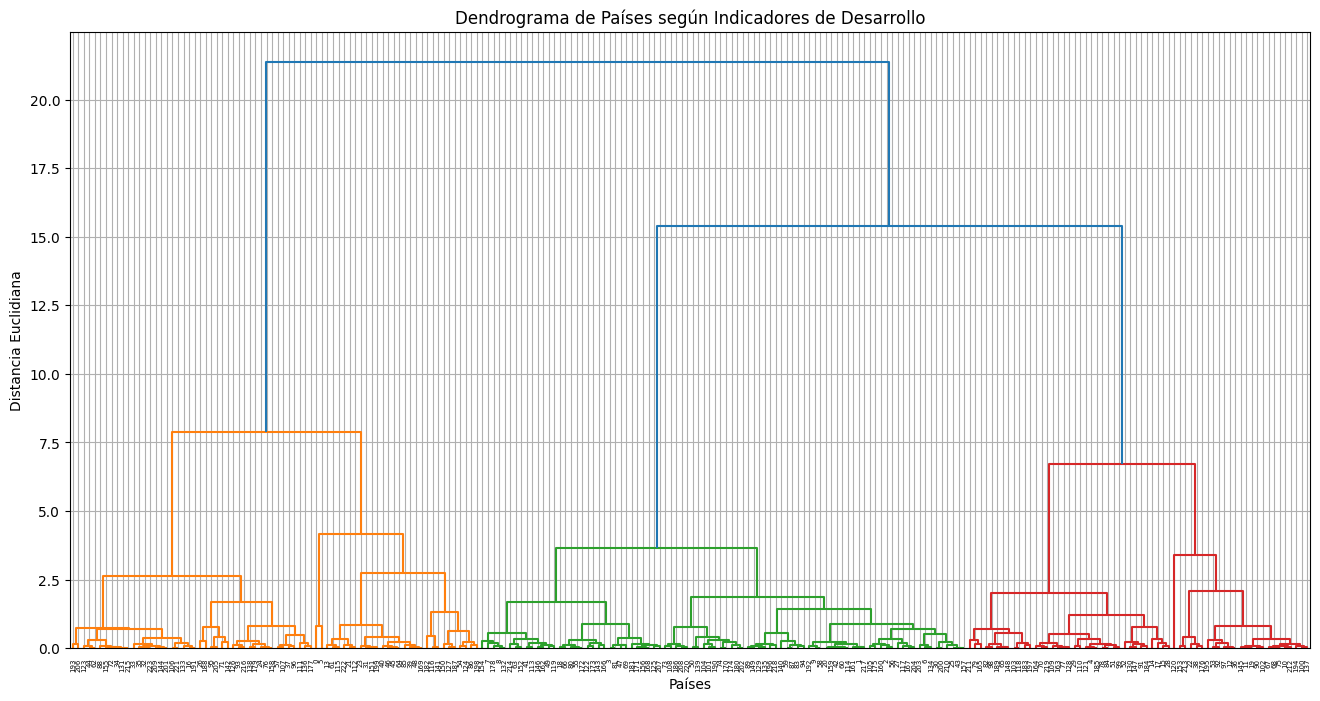

In [10]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

datos_numericos = df_normalizado.drop('Country', axis=1)

plt.figure(figsize=(16, 8))
dendrograma = sch.dendrogram(sch.linkage(datos_numericos, method='ward'))

plt.title('Dendrograma de Países según Indicadores de Desarrollo')
plt.xlabel('Países')
plt.ylabel('Distancia Euclidiana')
plt.grid(True)
plt.show()

### Responder las siguientes preguntas:

#### ¿Cuántos clústeres recomendarías según el dendrograma?
 Tres clusters
#### ¿Cómo interpretarías los grupos en términos de desarrollo económico?
Alto, medio y bajo 

## 5️. Aplicar Clustering Jerárquico

Los estudiantes deben aplicar el algoritmo de clustering jerárquico y asignar cada país a un clúster.

In [11]:
from sklearn.cluster import AgglomerativeClustering

# Aplicar Clustering Jerárquico con 3 clústeres
modelo_cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')

# Entrenamiento y asignación de clústeres
clusters = modelo_cluster.fit_predict(datos_numericos)

# Agregar la columna 'Cluster' al DataFrame
df_normalizado['Cluster'] = clusters

print(df_normalizado.head())

           Country  GDP ($ per capita)  Infant mortality (per 1000 births)  \
0     Afghanistan            -0.898485                            3.612577   
1         Albania            -0.520699                           -0.396110   
2         Algeria            -0.371573                           -0.127637   
3  American Samoa            -0.172738                           -0.743029   
4         Andorra             0.920854                           -0.890859   

   Cluster  
0        0  
1        2  
2        2  
3        2  
4        1  


## Mostrar algunos resultados
print(df'Country', 'GDP ($ per capita)', 'Life expectancy (years)', 'Cluster'.head(10))

In [12]:
print(df_normalizado[['Country', 'GDP ($ per capita)', 'Infant mortality (per 1000 births)', 'Cluster']].head(10))

              Country  GDP ($ per capita)  Infant mortality (per 1000 births)  \
0        Afghanistan            -0.898485                            3.612577   
1            Albania            -0.520699                           -0.396110   
2            Algeria            -0.371573                           -0.127637   
3     American Samoa            -0.172738                           -0.743029   
4            Andorra             0.920854                           -0.890859   
5             Angola            -0.779184                            4.408934   
6           Anguilla            -0.113087                           -0.409987   
7  Antigua & Barbuda             0.125515                           -0.454449   
8          Argentina             0.145398                           -0.575658   
9            Armenia            -0.620116                           -0.346267   

   Cluster  
0        0  
1        2  
2        2  
3        2  
4        1  
5        0  
6        2  
7   

## Responder las siguientes preguntas:

### ¿Cuántos países hay en cada clúster?

In [13]:
conteo_clusters = df_normalizado['Cluster'].value_counts().sort_index()
print(conteo_clusters)

Cluster
0    74
1    62
2    88
Name: count, dtype: int64


### ¿Cómo describirías los clústeres en función del desarrollo económico?

Interpretando según las variables utilizadas (PIB per cápita, esperanza de vida y mortalidad infantil), podrías describir así:

Clúster	Descripción
- **0 Países con bajo desarrollo:** PIB per cápita bajo, alta mortalidad infantil, baja esperanza de vida. Condiciones socioeconómicas desfavorables.
- **1 Países con desarrollo medio:** Indicadores intermedios, mortalidad infantil y esperanza de vida equilibrados. Pueden ser países emergentes.
- **2 Países con alto desarrollo:** PIB per cápita alto, baja mortalidad infantil, alta esperanza de vida. Son economías avanzadas.

## 6️. Visualizar los Clústeres

Los estudiantes deben graficar los clústeres para interpretar la segmentación de países.



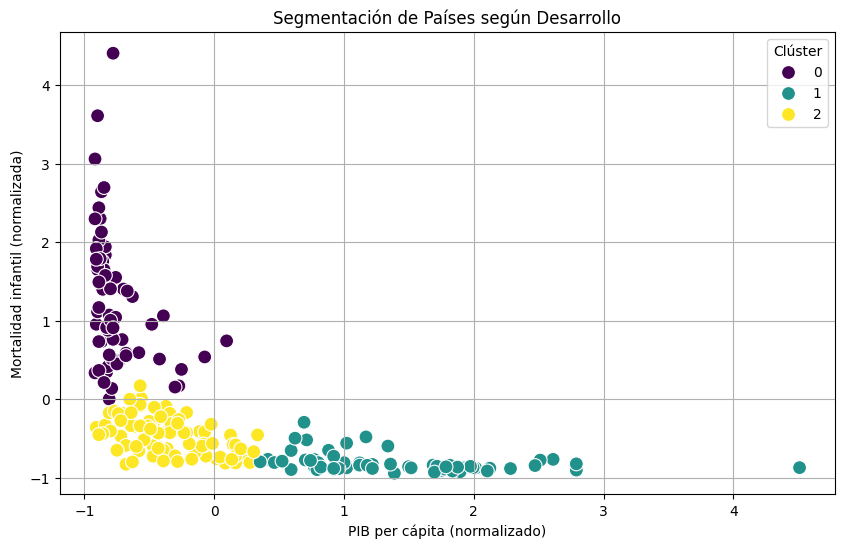

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Graficar los clústeres usando los datos normalizados
sns.scatterplot(
    x=df_normalizado['GDP ($ per capita)'],
    y=df_normalizado['Infant mortality (per 1000 births)'],
    hue=df_normalizado['Cluster'],
    palette='viridis',
    s=100
)

plt.title('Segmentación de Países según Desarrollo')
plt.xlabel('PIB per cápita (normalizado)')
plt.ylabel('Mortalidad infantil (normalizada)')
plt.legend(title='Clúster')
plt.grid(True)
plt.show()